In [1]:
import pandas as pd
from models.transformer_classifier import HateSpeechDetector
import importlib
import utils.evaluation as evaluator


2025-01-10 17:29:48.905016: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
importlib.reload(evaluator)

<module 'utils.evaluation' from '/Users/trinb/works/vietnamese-hate-speech-detection/utils/evaluation.py'>

### Prepare Test dataset

In [3]:
test = pd.read_csv("data/processed_test.csv", index_col=False)
test_texts = test['text'].values.tolist()
test_labels = test['labels'].values.tolist()

In [4]:
text_labels = {0:'clean', 1:'offensive', 2:'hate'}

## Bert Based Cased

In [5]:
bert_clf = HateSpeechDetector.load_model("models/bert-base-cased/")

F1 - micro: 0.8506666666666667
F1 - macro: 0.610387421951403


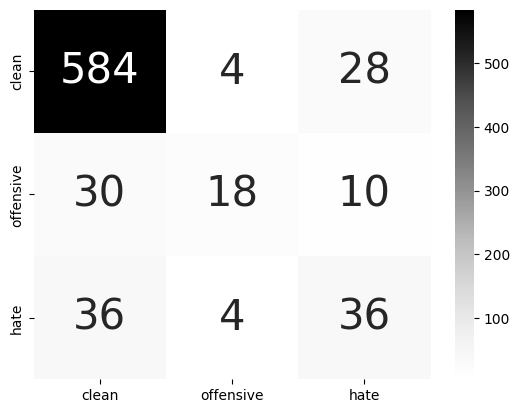

In [6]:
evaluator.evaluate(bert_clf, test_texts[0:750], test_labels[0:750])

## Pho Bert

In [8]:
phobert_clf = HateSpeechDetector.load_model("models/phobert2/")

In [13]:
phobert_clf.predict(test_texts)

ValueError: Input is not valid. Should be a string, a list/tuple of strings or a list/tuple of integers.

In [9]:
evaluator.evaluate(phobert_clf, test_texts, test_labels)

['Đúng mấy thằng bệnh_hoạn', 'Dm_Tôn_Ngộ_Không trông chán', 'Chui nua di co bo tat ngua', 'đứng dẩy thành ca_sĩ đc rồi .Thế đợt a Bảnh đội ca_sĩ nổi_tiếng đéo đi tù', 'Lồn có .Cái lồn', 'Minh_Hoàng top ms ghê vl', 'Hải_Yến vl cảm chán r , lạy m', 'Vũ_Mai_Ly ui', 'Tinh_trùng khuyết_tật cã bè_lũ tham_quan bé thằn bố cháu', 'Vũ_Thanh_Huyền chán vl câu mấy câu_đầu chửi bao_nhiêu câu thối kém tiền ta kệ mẹ ta , núp gầm giường ta thiện .Mệt_mỏi mấy thiện online .', 'Hải_Yến Đ care cmt gì ???Ô m à ?', 'Địt_mẹ .Ông đc gửi hộp_quẹt zippo 100 đô .Lúc hàng hộp ko , hộp_quẹt bọn luộc', 'Dâm l', 'Nguồn quốc việt', 'vãi đớp', 'Chết mẹ', 'xã_hội vn thối_nát rồi ... bây h mong vơ_vét dân chuồn thôi .. hồ_chủ_tịch hai', 'Chị độc_tài khoản chuyễn thẳng 10.000 USD tặng nè ... lol phếc', 'Nguyễn_Sơn tđn ghét thầy tút cu cmt', 'hả thầy', 'Bệnh_nhân 17 ( nôi lây bệnh )', 'Hiệp_Đinh v m k đọc à , viết đọc kĩ nha thằng óc cứt , mắt rà chữ não , nguy_hiểm xã_hội', 'Cái lỗn cát khôg', 'Cướp đêm giặc , cướp quan

ValueError: Input is not valid. Should be a string, a list/tuple of strings or a list/tuple of integers.